## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [3]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [269]:
df = pd.read_csv("ab_data.csv")

b. Use the below cell to find the number of rows in the dataset.

In [270]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [271]:
user_unique = df.user_id.nunique();
user_unique

290584

d. The proportion of users converted.

In [272]:
total_unique_conv = df.query('converted == "1"').user_id.nunique();
total_unique_conv

35173

In [273]:
convert_unique = total_unique_conv / user_unique;
convert_unique

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't line up.

In [290]:
mismatch = df

In [291]:
mismatch['match'] = np.where((df['group'] == 'treatment') & (df['landing_page'] == 'new_page'), 'match','mismatch')

In [292]:
mismatch.head(15)

,user_id,timestamp,group,landing_page,converted,match
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,mismatch
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,mismatch
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,match
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,match
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,mismatch
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,mismatch
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,match
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,mismatch
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,match
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,match


In [293]:
(mismatch['match'] == 'mismatch').sum()

149167

The classroom quiz suggests that this should be 3893 but my approach seems correct.

f. Do any of the rows have missing values?

In [302]:
df.drop('match', axis = 1, inplace = True); #drops the match column above

In [303]:
#Check rows with missing values
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


There does not appear to be any missing rows in our data

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [304]:
cond_1 = (df['group'] == 'treatment') & (df['landing_page'] == 'new_page');
cond_2 = (df['group'] == 'control') & (df['landing_page'] == 'old_page');
df2 = pd.DataFrame(df[cond_1|cond_2]);

In [305]:
df2.head() #Output for quick check

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [306]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [307]:
unique_users = df2['user_id'].nunique();
unique_users

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [308]:
dup_df = df2[df2['user_id'].duplicated(keep = False)]
a = dup_df.groupby('user_id').apply(lambda x: list(x.index))
a

user_id
773192    [1899, 2893]
dtype: object

c. What is the row information for the repeat **user_id**? 

In [309]:
df2.loc[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [310]:
df2.drop(2893, inplace=True) #Drop the second value from the output above but keep dataframe

In [311]:
df2.loc[df2['user_id'] == 773192] #Verify that drop happened

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [312]:
# Converted = 1 | Total unique user_id
converted_users = (df2.converted == 1).sum() #Converted users
prob_conv = (converted_users/unique_users)

In [313]:
prob_conv

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [314]:
# Probability user converted(Conv) given that  user in control group(Ctrl)
# Can also be written as P(Conv and Ctrl)/P(Ctrl) 

total_ctrl = df2.query('group == "control"').user_id.nunique()
prob_ctrl = total_ctrl/unique_users
#Users who converted and were in control group
conv_and_ctrl = df2[(df2['group']=='control') & (df2['converted']== 1)].user_id.nunique() 


In [315]:
conv_and_ctrl

17489

In [316]:
prob_conv_and_ctrl = conv_and_ctrl/unique_users
prob_conv_and_ctrl

0.06018569501417834

In [317]:
#P(Conv|Ctrl)
conv_giv_ctrl = prob_conv_and_ctrl/prob_ctrl
conv_giv_ctrl

0.12038630450046119

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [318]:
# Probability user converted(Conv) given that  user in treatment group(Trt)
# Can also be written as P(Conv and Trt)/P(Trt) 
total_trt = df2.query('group == "treatment"').user_id.nunique()
prob_trt = total_trt/unique_users
#Users who converted and were in treatment group
conv_and_trt = df2[(df2['group']=='treatment') & (df2['converted']== 1)].user_id.nunique() 

In [319]:
conv_and_trt

17264

In [320]:
prob_conv_and_prob_trt = conv_and_trt/unique_users
prob_conv_and_prob_trt

0.05941139223081794

In [321]:
conv_giv_trt = prob_conv_and_prob_trt/prob_trt
conv_giv_trt

0.11880806551510564

d. What is the probability that an individual received the new page?

In [322]:
total_new_page = df2.query('landing_page == "new_page"').user_id.nunique()
total_new_page/unique_users

0.5000619442226688

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

The probability of converting given an individual received the old page was 12.04% while the probability of converting given an individual received the treatment page was 11.88%. The probability of converting regardless of page received was 11.96%. These numbers seem to suggest that the rate of conversion is the same regardless of the page that the user received. This would seem to signal that the change does not need to be made in the form that it was presented in the pages since it does not improve convertion rate. We also see that the probability of receiving a new page is 50/50 to that of receiving an old page therefore users are equally likely to get either page.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

The null hypothesis is that there is no change in the conversion rate regardless of the page the user received thus the null hypothesis is: <br />
&nbsp;&nbsp;&nbsp;&nbsp;    H<sub>0</sub> : *p<sub>new</sub>*  $\leq$ *p<sub>old</sub>* <br />
While the alternative hypothesis is that the new page is better than the old page. Therefore the alternate hypothesis is:  <br />
&nbsp;&nbsp;&nbsp;&nbsp;    H<sub>1</sub> : *p<sub>new</sub>*  $\gt$ *p<sub>old</sub>* <br />

**Put your answer here.**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

In [323]:
(df2['landing_page'] == 'old_page').sum()

145274

a. What is the **convert rate** for $p_{new}$ under the null? 

In [324]:
p_new = prob_conv
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [325]:
p_old = prob_conv
p_old

0.11959708724499628

c. What is $n_{new}$?

In [326]:
n_new = (df2['landing_page'] == 'new_page').sum();
n_new

145310

d. What is $n_{old}$?

In [327]:
n_old = (df2['landing_page'] == 'old_page').sum();
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [328]:
new_page_converted = np.random.binomial(1, p_new, n_new);
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [329]:
old_page_converted = np.random.binomial(1,p_old, n_old);
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [330]:
new_page_converted.mean() - old_page_converted.mean()

-0.00050447430515064562

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [331]:
p_diffs = []
for _ in range (10000):
    sample = (np.random.binomial(1, p_new, n_new).mean()) - (np.random.binomial(1, p_old, n_old).mean())
    p_diffs.append(sample.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

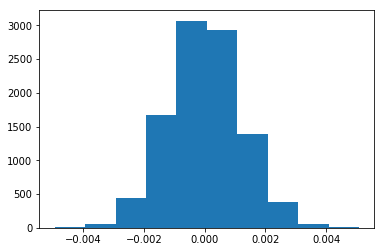

In [332]:
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [333]:
p_diffs = np.array(p_diffs)
null_value = np.random.normal(0, p_diffs.std(), p_diffs.size)

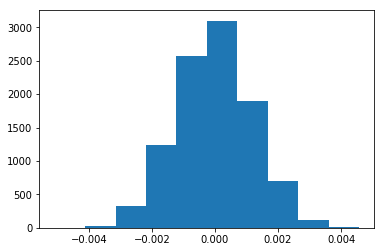

In [334]:
plt.hist(null_value);

In [335]:
obs_diff = conv_giv_ctrl - conv_giv_trt;
obs_diff

0.0015782389853555429

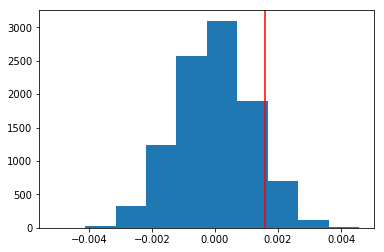

In [336]:
plt.hist(null_value);
plt.axvline(x=obs_diff, color= 'red');

In [337]:
(null_value > obs_diff).mean()

0.096699999999999994

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

The P-Value is what we computed in part **j**. Since this value of 0.0966 is greater than 0.05, we fail to reject the null hypothesis that there is a difference in the conversion rate between the old page and the new page. It is likely that our statistic was from this null and that there was no difference between the new and old pages.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [371]:
import statsmodels.api as sm

convert_old = conv_giv_ctrl
convert_new = conv_giv_trt
n_old = n_old
n_new = n_old

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [340]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new])

In [341]:
z_score

0.0032269888821244378

In [342]:
p_value

0.99742523986176368

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

Z score of 0.0032 means that the conversion rate was above the mean, which agrees with the findings in **j** since the line is clearly to the right of the normalized histogram thus being above the mean. The p value is larger than 0.05 therefore we fail to reject the null hypothesis and thus draw the same conclusion we did in part **k** that the values were not statistically significant. 

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?
<br/>Since the only two options for the answers to take are 1(conversion) or 0(no conversion), we use ***Logistic Regression*** model for this approach

**Put your answer here.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [350]:
df2['intercept'] = 1
df2['ab_page'] = df2.group.map(lambda x: 1 if x == 'treatment' else 0)

In [351]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [353]:
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


In [355]:
np.exp(-0.0150)

0.98511193960306265

Holding all else constant, a user is 0.985 more likely to convert if they got the new page than if they got the old page

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [356]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 21 Mar 2018   Pseudo R-squ.:               8.077e-06
Time:                        19:03:29   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

P value associated with the ab_page is 0.190 while that in **Part II** was 0.997. This value differes from the P value in part two, we used a Type I error rate of 5% while this section uses a Type I error rate of 2.5%.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

It's a good idea to consider other factors in the regression model so that we can tease out hidden variables that could be influencing the conversion rate. It also increases our $R^2$ which at times might add strength to our model variables. Disadvanted of adding additional is that we might introduce multicollinearity in our model, introduce outliers to our model, have correlated errors and we may end up with a non-constant variance.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [357]:
ct_df = pd.read_csv('countries.csv')

In [358]:
ct_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [359]:
df3 = df2.set_index('user_id').join(ct_df.set_index('user_id'))

In [360]:
df3[['US','UK','CA']] = pd.get_dummies(df3['country'])

In [366]:
lm = sm.Logit(df3['converted'], df3[['intercept', 'US', 'UK']])
results = lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Wed, 21 Mar 2018   Pseudo R-squ.:               1.521e-05
Time:                        19:20:21   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
US            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

In [5]:
np.exp(-1.9967), np.exp(-0.0408), np.exp(0.0099)

(0.1357826273831706, 0.96002111497165088, 1.0099491671175422)

From the results above, it appears that country has an effect on conversion. A user in Canada is 0.136 more likely to convert holding all else constant. A user is US is 0.96 less likely to convert than a user from Canada while a UK user is 1.009 more likely than a user from Canada to convert holding all else constant.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [368]:
df3.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country,US,UK,CA,ab_US,ab_UK,ab_CA
user_id,,,,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1,0,0,0
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1,0,0,0
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,0,0,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,0,0,1
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1,0,0,0


In [369]:
df3[['ab_US','ab_UK','ab_CA']] = df3[['US','UK','CA']].multiply(df3['ab_page'], axis = 'index')

In [374]:
df3.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country,US,UK,CA,ab_US,ab_UK,ab_CA
user_id,,,,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1,0,0,0
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1,0,0,0
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,0,0,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,0,0,1
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1,0,0,0


In [377]:
inter = sm.Logit(df3['converted'], df3[['intercept', 'ab_page','US', 'UK','ab_US','ab_UK']])
inter_results = inter.fit()
inter_results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Wed, 21 Mar 2018   Pseudo R-squ.:               3.482e-05
Time:                        19:43:01   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
US            -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
ab_US         -0.0469      0.054     -0.872      0.383      -0.152       0.059
ab_UK          0.0314      0.027      1.181      0.238      -0.021       0.084
==============================================================================
"""

In [4]:
np.exp(-1.9865),np.exp(-0.0469), np.exp(0.0314)

(0.13717469767172208, 0.95418281110072622, 1.0318981806179213)

A Canadian user is 0.137 more likely to convert given that they viewed the new page holdng all else constant. A US user who viewed the new page is 0.95 more likely than a Canadian user who also viewed the new page. A UK user who viewed the new page is 1.032 more likely than a Canadian user who also viewed a new page holding all else constant.

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by continuing on to the next module in the program.